<a href="https://colab.research.google.com/github/Gru97/DeepLearningCourse/blob/main/session8_yolo_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python ultralytics

In [7]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [8]:
model= YOLO("yolo11x.pt")

In [11]:
def predict(model, img, classes=[], conf=0.5):
  if classes:
    result = model.predict(img, classes=classes, conf=conf)
  else:
    result = model.predict(img, conf=conf)
  return result

def predict_and_detect(chosen_model, img, classes=[], conf=0.5):
    results = predict(chosen_model, img, classes, conf=conf)

    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), 1)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 1)
    return img, results


In [45]:
# read the image
image = cv2.imread("/content/Capture.PNG")
result_img,_ = predict_and_detect(model, image, classes=[], conf=0.5)


0: 384x640 8 persons, 3 bicycles, 15 cars, 1 truck, 1 stop sign, 1 dog, 2 backpacks, 63.2ms
Speed: 3.9ms preprocess, 63.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


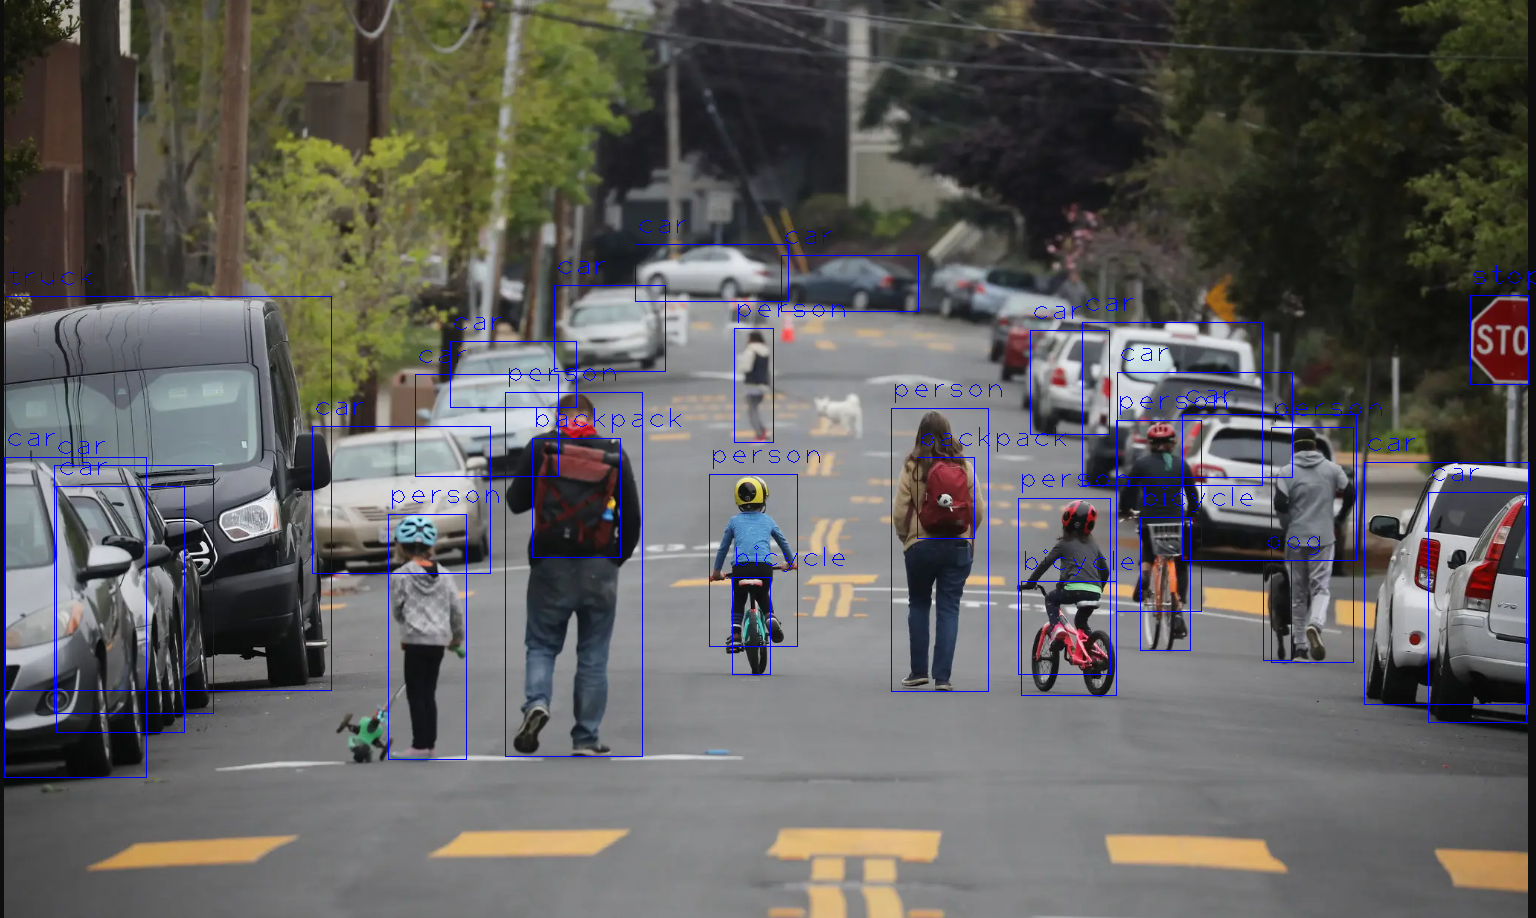

In [46]:
cv2_imshow(result_img)

In [13]:
def create_video_writer(video_cap, output_filename):
    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))

    return writer

In [ ]:
output_filename = "output.mp4"

video_path = r"/content/VID_20221101_113417.mp4"

cap = cv2.VideoCapture(video_path)
writer = create_video_writer(cap, output_filename)

while True:

    success, img = cap.read()

    if not success:
        break

    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
    writer.write(result_img)
    cv2_imshow( result_img)

    cv2.waitKey(1)

writer.release()

In [ ]:
_